# PyCaret Regression Tutorial

## Installation

In [ ]:
# Download and unzip files
# !wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
# !unzip -q wine+quality.zip

In [ ]:
# Install PyCaret with all dependencies
!pip install pycaret[full] --quiet

# Import PyCaret and check the version
import pycaret
from packaging import version

# Define the minimum required version
min_version = version.parse("3.0")

# Get the installed version of PyCaret
installed_version = version.parse(pycaret.__version__)

# Check if the installed version meets the requirement
if installed_version <= min_version:
    raise ImportError(f"PyCaret version must be greater than {min_version}, but {installed_version} is installed.")
else:
    print(f"PyCaret version {installed_version} is correctly installed.")

PyCaret version 3.3.2 is correctly installed.


## Setup

In [ ]:
import pandas as pd
df_wine = pd.read_csv('winequality-red.csv', sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Import RegressionExperiment and initialize the class
from pycaret.regression import RegressionExperiment

# Create an instance of RegressionExperiment
exp = RegressionExperiment()

# Initialize setup on the experiment with the correct target variable
exp.setup(data=df_wine, target='alcohol', session_id=123)

# Check the type of exp to confirm it is a RegressionExperiment
type(exp)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


pycaret.regression.oop.RegressionExperiment

## Compare Models

In [ ]:
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.8170
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.3710
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1650
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.4270
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.6440
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2430
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,1.3340
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0290
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.2700
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0490


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Analyze Model

### Plot Residuals

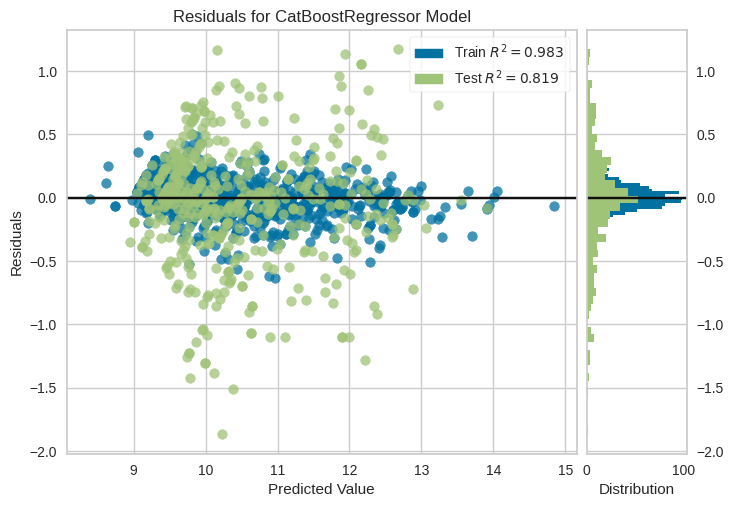

In [ ]:
exp.plot_model(best, plot = 'residuals')

### Plot Error

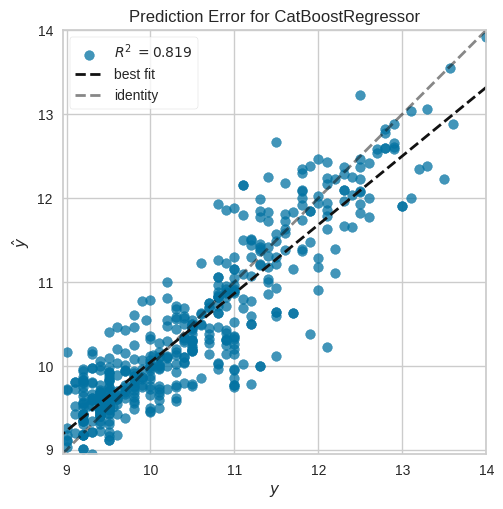

In [ ]:
exp.plot_model(best, plot = 'error')

### Plot Feature Importance

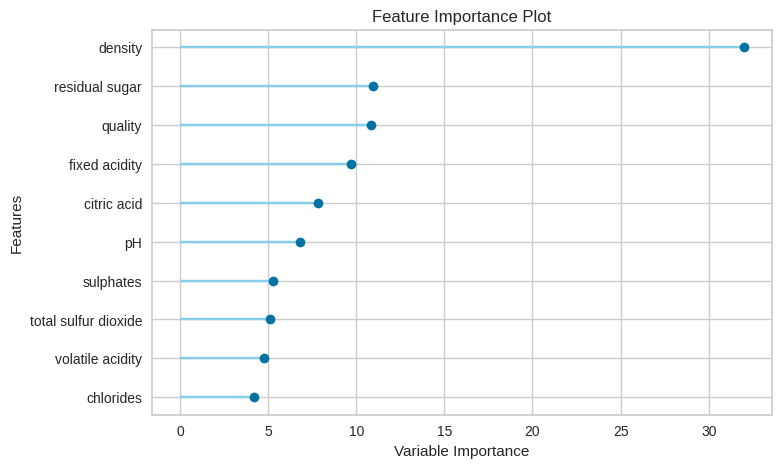

In [ ]:
exp.plot_model(best, plot = 'feature')

## Prediction

### Predict on Test set

In [ ]:
holdout_pred = exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3339,0.2136,0.4622,0.8188,0.0396,0.0315


### Show Predictions df

In [ ]:
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,12.2,11.395583
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,5,9.4,9.618191
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,5,9.2,9.351609
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,6,12.3,11.963622
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,5,9.3,9.798311


### Copying data and dropping alchol

In [ ]:
new_df_wine = df_wine.copy()
new_df_wine.drop('alcohol', axis=1, inplace=True)
new_df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


### Predict model on new_df_wine

In [ ]:
predictions = exp.predict_model(best, data = new_df_wine)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.433343
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.661195
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.762821
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.898262
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.433343


## Save Model

### Save Pipeline

In [ ]:
exp.save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x791ee2547eb0>)

### Load Pipeline

In [ ]:
loaded_best_pipeline = exp.load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x791ee2408520>)])

# Detailed function-by-function overview

## Setup

In [ ]:
import pandas as pd
from pycaret.regression import RegressionExperiment

df_wine = pd.read_csv('winequality-red.csv', sep=';')

exp = RegressionExperiment()

exp.setup(data=df_wine, target='alcohol', session_id=123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


### Accessing Configurations

#### Get all available configurations

In [ ]:
exp.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

#### Access transformed training data

In [ ]:
X_train_transformed = exp.get_config('X_train_transformed')
X_train_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,6.0
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,5.0
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,6.0
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,8.0
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,5.0


### Changing Configurations

#### Check the current seed

In [ ]:
print(f"The current seed is: {exp.get_config('seed')}")

The current seed is: 123


#### Change the seed

In [ ]:
exp.set_config('seed', 786)
print(f"The new seed is: {exp.get_config('seed')}")

The new seed is: 786


### Compare baseline models

In [ ]:
best_model = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.2830
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.4900
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.2640
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.3570
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,1.1150
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2200
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0440
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0300
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1570
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### Customizing Compare Models

#### Compare specific models

In [ ]:
exp.compare_models(include=['lr', 'dt', 'rf', 'gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.6560
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2250
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0410
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0650


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=123)

#### Exclude specific models

In [ ]:
exp.compare_models(exclude=['dummy', 'knn'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.3860
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.4240
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1620
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.6120
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.6470
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2190
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0470
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0490
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1560
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0370


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

## Create Model

#### Create a Linear Regression model

In [ ]:
lr_model = exp.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4313,0.2999,0.5477,0.6527,0.0486,0.0425
1,0.4913,0.4737,0.6883,0.5398,0.0598,0.0471
2,0.4492,0.3262,0.5712,0.7267,0.0495,0.0431
3,0.5106,0.4413,0.6643,0.6643,0.0568,0.0487
4,0.4063,0.2858,0.5346,0.6787,0.0458,0.0385
5,0.4342,0.3373,0.5808,0.7183,0.0492,0.0408
6,0.3647,0.2142,0.4628,0.8063,0.0400,0.0345
7,0.4853,0.4108,0.6409,0.6687,0.0555,0.0465
8,0.4853,0.3993,0.6319,0.5606,0.0554,0.0468


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Create a Ridge Regression model with custom alpha

In [ ]:
ridge_model = exp.create_model('ridge', alpha=0.5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5515,0.5004,0.7074,0.4205,0.0616,0.0543
1,0.7387,0.8851,0.9408,0.1403,0.0814,0.0702
2,0.7378,0.8807,0.9384,0.2622,0.0796,0.0698
3,0.6481,0.7565,0.8697,0.4246,0.0729,0.0609
4,0.6098,0.6221,0.7887,0.3006,0.0673,0.0576
5,0.6963,0.7682,0.8765,0.3583,0.0737,0.0649
6,0.6461,0.8487,0.9213,0.2322,0.0765,0.0596
7,0.7217,0.8082,0.8990,0.3481,0.0768,0.0686
8,0.6083,0.6310,0.7944,0.3057,0.0687,0.0581


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Returning Training Scores

#### Create model and return training scores

In [ ]:
lr_model = exp.create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Model

#### Tune the Decision Tree model

In [ ]:
dt_model = exp.create_model('dt')
tuned_dt = exp.tune_model(dt_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4177,0.4210,0.6489,0.5124,0.0567,0.0414
1,0.4845,0.5916,0.7691,0.4254,0.0667,0.0454
2,0.5025,0.5364,0.7324,0.5507,0.0636,0.0486
3,0.4135,0.4557,0.6750,0.6534,0.0571,0.0390
4,0.5164,0.6839,0.8270,0.2310,0.0709,0.0488
5,0.5018,0.5630,0.7504,0.5297,0.0633,0.0458
6,0.3963,0.5239,0.7238,0.5261,0.0602,0.0366
7,0.5567,0.6236,0.7897,0.4970,0.0689,0.0534
8,0.4598,0.4899,0.6999,0.4609,0.0592,0.0427


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4751,0.4481,0.6694,0.4810,0.0595,0.0472
1,0.5227,0.5959,0.7720,0.4211,0.0663,0.0493
2,0.4723,0.5107,0.7146,0.5722,0.0619,0.0453
3,0.4765,0.4247,0.6517,0.6770,0.0567,0.0458
4,0.4948,0.4233,0.6506,0.5241,0.0557,0.0467
5,0.5002,0.5222,0.7227,0.5638,0.0598,0.0457
6,0.4623,0.4956,0.7040,0.5516,0.0587,0.0429
7,0.5105,0.4498,0.6706,0.6372,0.0579,0.0486
8,0.4759,0.4534,0.6733,0.5011,0.0581,0.0453


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### Customizing Tuning

#### Define a custom grid

In [ ]:
dt_params = {'max_depth': [2, 4, 6, 8, 10]}

#### Tune model with custom grid and optimize for MAE

In [ ]:
tuned_dt = exp.tune_model(dt_model, custom_grid=dt_params, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4061,0.3462,0.5883,0.5991,0.0518,0.0404
1,0.5068,0.5755,0.7586,0.4410,0.0655,0.0476
2,0.5320,0.5802,0.7617,0.5139,0.0661,0.0515
3,0.4464,0.4998,0.7070,0.6198,0.0588,0.0420
4,0.5103,0.6076,0.7795,0.3168,0.0665,0.0482
5,0.5528,0.5784,0.7605,0.5169,0.0644,0.0508
6,0.4257,0.5421,0.7363,0.5096,0.0610,0.0393
7,0.5494,0.5447,0.7380,0.5607,0.0640,0.0526
8,0.4598,0.4519,0.6722,0.5028,0.0570,0.0430


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Accessing the Tuner Object

#### Tune model and return tuner

In [ ]:
tuned_dt, tuner = exp.tune_model(dt_model, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4751,0.4481,0.6694,0.4810,0.0595,0.0472
1,0.5227,0.5959,0.7720,0.4211,0.0663,0.0493
2,0.4723,0.5107,0.7146,0.5722,0.0619,0.0453
3,0.4765,0.4247,0.6517,0.6770,0.0567,0.0458
4,0.4948,0.4233,0.6506,0.5241,0.0557,0.0467
5,0.5002,0.5222,0.7227,0.5638,0.0598,0.0457
6,0.4623,0.4956,0.7040,0.5516,0.0587,0.0429
7,0.5105,0.4498,0.6706,0.6372,0.0579,0.0486
8,0.4759,0.4534,0.6733,0.5011,0.0581,0.0453


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ensemble Model

#### Bagging ensemble

In [ ]:
bagged_dt = exp.ensemble_model(dt_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3739,0.2661,0.5158,0.6919,0.0463,0.0372
1,0.4684,0.4456,0.6675,0.5672,0.0573,0.0445
2,0.3988,0.3115,0.5582,0.7390,0.0484,0.0383
3,0.3971,0.3168,0.5628,0.7591,0.0480,0.0378
4,0.3129,0.2488,0.4988,0.7203,0.0422,0.0296
5,0.3875,0.3161,0.5622,0.7359,0.0464,0.0355
6,0.3567,0.3226,0.5679,0.7082,0.0465,0.0334
7,0.4661,0.3790,0.6156,0.6943,0.0535,0.0447
8,0.4045,0.3650,0.6041,0.5984,0.0515,0.0385


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#### Boosting ensemble

In [ ]:
boosted_dt = exp.ensemble_model(dt_model, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3266,0.2379,0.4877,0.7245,0.0427,0.0317
1,0.4562,0.4884,0.6989,0.5256,0.0607,0.0435
2,0.3499,0.2773,0.5266,0.7677,0.0457,0.0337
3,0.3863,0.3505,0.5920,0.7334,0.0509,0.0369
4,0.3574,0.3189,0.5647,0.6414,0.0481,0.0340
5,0.3924,0.3998,0.6323,0.6660,0.0521,0.0355
6,0.3043,0.3466,0.5888,0.6864,0.0475,0.0277
7,0.3966,0.3338,0.5778,0.7307,0.0502,0.0378
8,0.3976,0.3844,0.6200,0.5770,0.0534,0.0379


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Blend Models

#### Select top 3 models

In [ ]:
top3_models = exp.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.3140
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.9410
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1820
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.3640
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.9480
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2200
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0500
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0340
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1580
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0340


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

#### Blend top 3 models

In [ ]:
blended_models = exp.blend_models(top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2983,0.1768,0.4204,0.7953,0.0375,0.0294
1,0.3777,0.3032,0.5507,0.7055,0.0472,0.0358
2,0.3386,0.2311,0.4808,0.8064,0.0416,0.0325
3,0.3487,0.2590,0.5089,0.8030,0.0436,0.0333
4,0.2765,0.1833,0.4281,0.7939,0.0365,0.0263
5,0.3235,0.2421,0.4921,0.7977,0.0405,0.0297
6,0.3150,0.3069,0.5540,0.7224,0.0444,0.0290
7,0.3400,0.2271,0.4766,0.8168,0.0409,0.0324
8,0.3302,0.2481,0.4981,0.7270,0.0430,0.0315


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Stack Models

#### Stack top 3 models

In [ ]:
stacked_models = exp.stack_models(top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2891,0.1674,0.4091,0.8062,0.0366,0.0284
1,0.3805,0.3065,0.5537,0.7022,0.0475,0.0361
2,0.3441,0.2301,0.4797,0.8072,0.0418,0.0332
3,0.3547,0.2614,0.5113,0.8012,0.0439,0.0339
4,0.2860,0.1895,0.4353,0.7869,0.0368,0.0271
5,0.3184,0.2387,0.4886,0.8006,0.0401,0.0293
6,0.3046,0.2929,0.5412,0.7350,0.0432,0.0280
7,0.3383,0.2247,0.4740,0.8188,0.0407,0.0323
8,0.3185,0.2244,0.4737,0.7531,0.0409,0.0305


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Plot Model

#### Plot residuals

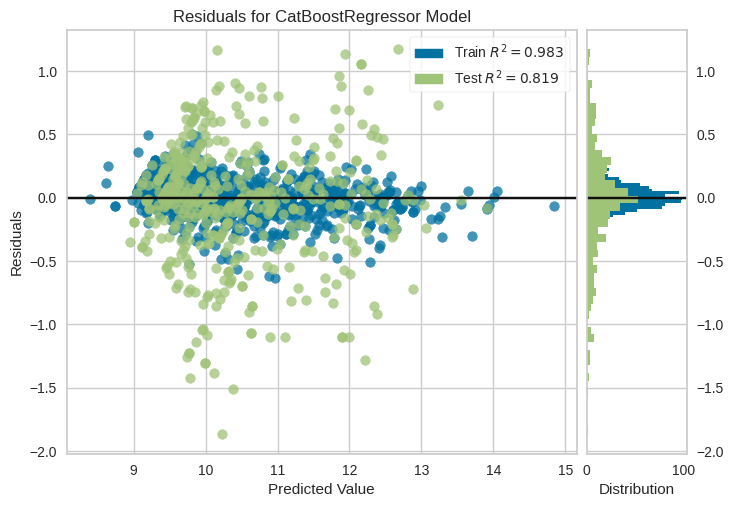

In [ ]:
exp.plot_model(best_model, plot='residuals')

#### Plot feature importance

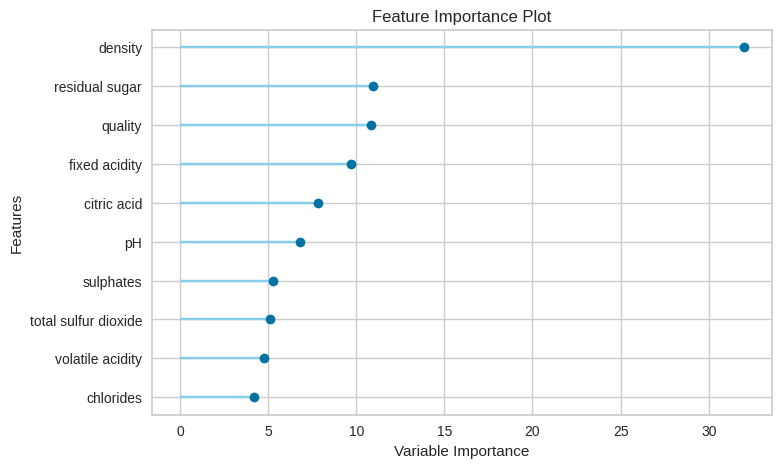

In [ ]:
exp.plot_model(best_model, plot='feature')

## Interpret Model

#### Interpret the model using summary plot

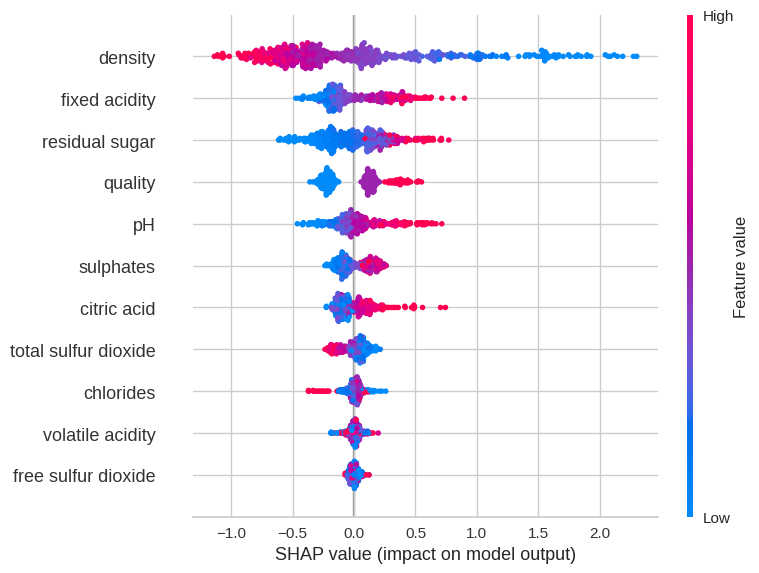

In [ ]:
exp.interpret_model(best_model, plot='summary')

#### Interpret a specific observation

In [ ]:
exp.interpret_model(best_model, plot='reason', observation=5)

## Get Leaderboard

#### Get the leaderboard

In [ ]:
leaderboard = exp.get_leaderboard()
leaderboard

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4532,0.3609,0.5971,0.6691,0.0517,0.0434
1,Lasso Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8276,1.0688,1.0309,0.0308,0.0875,0.0782
2,Ridge Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.6673,0.7503,0.8632,0.3169,0.0734,0.0632
3,Elastic Net,"(TransformerWrapper(include=['fixed acidity', ...",0.8211,1.0630,1.0280,0.0361,0.0873,0.0776
4,Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4532,0.3609,0.5971,0.6691,0.0517,0.0434
...,...,...,...,...,...,...,...,...
71,Light Gradient Boosting Machine,"(TransformerWrapper(include=['fixed acidity', ...",0.3502,0.2694,0.5169,0.7527,0.0440,0.0333
72,CatBoost Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.3321,0.2393,0.4873,0.7818,0.0415,0.0316
73,Dummy Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.8665,1.1158,1.0537,-0.0126,0.0896,0.0820


## AutoML

#### Automatically select the best model

In [ ]:
automl_model = exp.automl()
automl_model

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x791e1b47ab60>),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

## Dashboard



#### Generate an interactive dashboard for the Decision Tree model




In [ ]:
exp.dashboard(best_model, display_format='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create App

#### Create a Gradio app for the best model

In [ ]:
exp.create_app(best_model, app_kwargs={})

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://946e3bd8a1cf2b4308.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Create API

#### Create a POST API for the best model

In [ ]:
exp.create_api(best_model, api_name='my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


## Create Docker

#### Create Docker files for the API

In [ ]:
exp.create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## Convert Model

#### Convert the trained model to Java

In [ ]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
java_code = exp.convert_model(lr_model, language='java')
print(java_code)

public class Model {
    public static double score(double[] input) {
        return 564.42431640625 + input[0] * 0.4932469427585602 + input[1] * 0.5958864688873291 + input[2] * 0.7698813676834106 + input[3] * 0.25098392367362976 + input[4] * -1.0813595056533813 + input[5] * -0.0012979209423065186 + input[6] * -0.0015959739685058594 + input[7] * -574.3512573242188 + input[8] * 3.4453697204589844 + input[9] * 1.0770272016525269 + input[10] * 0.22632351517677307;
    }
}



## Finalize Model

#### Finalize the best model by training on the entire dataset

In [ ]:
final_best = exp.finalize_model(best_model)
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x791ee063abf0>)])

## Convert Model

In [ ]:
print(exp.convert_model(lr_model, language='java'))

public class Model {
    public static double score(double[] input) {
        return 564.42431640625 + input[0] * 0.4932469427585602 + input[1] * 0.5958864688873291 + input[2] * 0.7698813676834106 + input[3] * 0.25098392367362976 + input[4] * -1.0813595056533813 + input[5] * -0.0012979209423065186 + input[6] * -0.0015959739685058594 + input[7] * -574.3512573242188 + input[8] * 3.4453697204589844 + input[9] * 1.0770272016525269 + input[10] * 0.22632351517677307;
    }
}



## Deploy Model

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## Save / Load Model

#### Save Model

In [ ]:
exp.save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x791ee2547eb0>)

#### Load Model

In [ ]:
loaded_from_disk = exp.load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x791ee06d7c40>)])

## Save / Load Experiment

#### Save Experiment

In [ ]:
exp.save_experiment('my_experiment')

#### Load Experiment from Disk


In [ ]:
exp_from_disk = exp.load_experiment('my_experiment', data=df_wine)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple
